# Datos de intensidades de señal WiFi por Habitacion

El DataFrame obtenido representa una muestra de datos de intensidades de señales WiFi en una casa de 4 habitaciones. Tiene un total de 2000 muestras (500 muestras por habitacion). Cuenta asi con 8 columnas en total donde las 7 primeras son las antenas y la ultima son las habitaciones. 

El objetivo del analisis sera ver la precision con la que se puede ubicar dichas habitaciones solo conociendo las lecturas de las antenas. En resumen, se localizaran las piezas. 

El primer paso sera realizar un analisis exploratorio del que nos permitira entender como esta compuesto y si se necesita llevar adelante una limpieza para no perjudicar los resultados finales

## EDA (Analisis exploratorio de datos)

Cargamos el dataframe, asignamos el nombre de las columnas y comenzamos la exploracion

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
# Carga del DF

url='https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Wireless%20Indoor%20Localization/wifi_localization.txt'
df=pd.read_csv(url, sep='\t', header=None)
columnas=['WIFI1','WIFI2','WIFI3','WIFI4','WIFI5','WIFI6','WIFI7', 'ROOM']
mapeocolumnas=dict(zip(df.columns,columnas))
df=df.rename(columns=mapeocolumnas)

In [115]:
#Muestra de 10 filas aleatorias del DF

df.sample(10)

,WIFI1,WIFI2,WIFI3,WIFI4,WIFI5,WIFI6,WIFI7,ROOM
1420,-47,-57,-52,-44,-67,-78,-75,3
1219,-51,-56,-60,-48,-60,-86,-83,3
1350,-52,-56,-52,-50,-65,-86,-84,3
1257,-51,-47,-50,-49,-59,-80,-85,3
1655,-63,-58,-47,-66,-48,-93,-92,4
1609,-64,-59,-52,-65,-50,-88,-85,4
774,-17,-53,-57,-17,-70,-77,-73,2
1082,-50,-56,-48,-48,-63,-80,-91,3
1144,-52,-58,-51,-53,-60,-80,-80,3
1677,-69,-52,-48,-66,-48,-88,-87,4


In [116]:
# Informacion sobre sus columnas y las entradas de datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   WIFI1   2000 non-null   int64
 1   WIFI2   2000 non-null   int64
 2   WIFI3   2000 non-null   int64
 3   WIFI4   2000 non-null   int64
 4   WIFI5   2000 non-null   int64
 5   WIFI6   2000 non-null   int64
 6   WIFI7   2000 non-null   int64
 7   ROOM    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [117]:
# Datos estadisticos basicos para tener una idea del conjunto de datos

df.describe()

,WIFI1,WIFI2,WIFI3,WIFI4,WIFI5,WIFI6,WIFI7,ROOM
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-52.330500,-55.623500,-54.964000,-53.566500,-62.640500,-80.985000,-81.726500,2.500000
std,11.321677,3.417688,5.316186,11.471982,9.105093,6.516672,6.519812,1.118314
min,-74.000000,-74.000000,-73.000000,-77.000000,-89.000000,-97.000000,-98.000000,1.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-87.000000,1.750000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000,2.500000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000,3.250000
max,-10.000000,-45.000000,-40.000000,-11.000000,-36.000000,-61.000000,-63.000000,4.000000


In [118]:
# Observamos las habitaciones y la cantidad de muestras que hay en las mismas

df.ROOM.value_counts()

1    500
2    500
3    500
4    500
Name: ROOM, dtype: int64

In [119]:
# Contamos si existen valores nulos por columna

df.isnull().sum()

WIFI1    0
WIFI2    0
WIFI3    0
WIFI4    0
WIFI5    0
WIFI6    0
WIFI7    0
ROOM     0
dtype: int64

In [120]:
# Vemos las medias de intensidad del WiFi por habitacion

df.groupby('ROOM').mean()

,WIFI1,WIFI2,WIFI3,WIFI4,WIFI5,WIFI6,WIFI7
ROOM,,,,,,,
1,-62.490,-56.276,-60.520,-64.182,-70.262,-82.920,-84.026
2,-36.924,-56.108,-55.902,-38.066,-67.614,-72.644,-73.498
3,-49.726,-54.886,-52.784,-50.702,-63.232,-81.368,-82.392
4,-60.182,-55.224,-50.650,-61.316,-49.454,-87.008,-86.990


Hasta este punto notamos tener un DataFrame limpio sin errores de carga ni valores nulos. Lo que nos permite continuar el analisis con graficos que nos dejaran ver como se comportan los datos

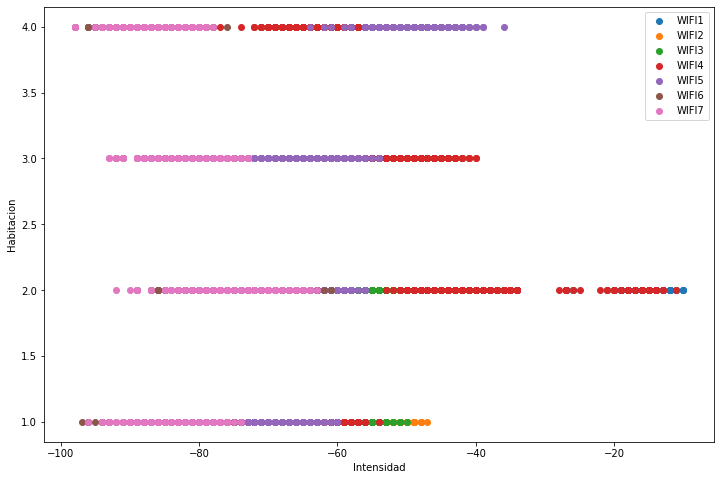

In [121]:
# Para ir conociendo realizamos un grafico de scatter plot por habitacion

fig = plt.figure(figsize=(12, 8))

for n in ['WIFI1','WIFI2','WIFI3','WIFI4','WIFI5','WIFI6','WIFI7']:
  plt.scatter(df[n],df['ROOM'],label=n)
plt.xlabel('Intensidad')
plt.ylabel('Habitacion')
plt.legend()


Se puede observar que contamos con los datos de intensidad para las 4 habitaciones,y que parecieran tener una caracteristica de la intensidad percibida de cada antena

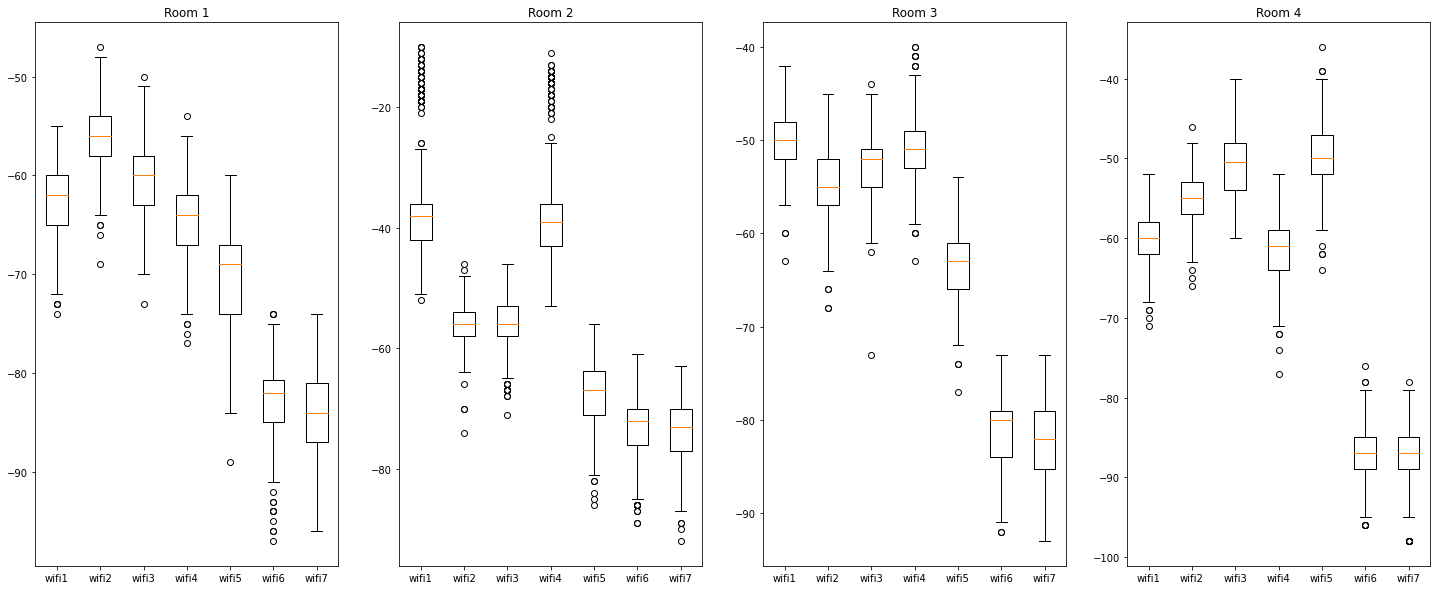

In [122]:
# Realizamos diagramas de caja por habitacion

room_dict = {}
for room in set(df['ROOM']):
    room_dict[room] = df[df['ROOM']==room].drop('ROOM', axis=1)

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(25,10))

for i, (room, data) in enumerate(room_dict.items()):
    axs[i].boxplot(data.values)
    axs[i].set_title('Room '+str(room))
    axs[i].set_xticklabels(['wifi'+str(j) for j in range(1,8)])

plt.show()

En el diagrama de cajas por habitacion se observa la media y el rango en el que cada WiFi afecta a las mismas, por lo que de primeras impresiones se puede clasificar las habitaciones por la señal recibida de cada antena. Por lo que se comienza elaborando un arbol de decision con la biblioteca de Sklearn y viendo su probabilidad de acierto.  

# Arbol de decision

Se seleccionas las variables explicativas (Antenas de WiFi) y las objetivos (las habitaciones)

In [146]:
explicativas=df.drop(columns='ROOM')
objetivo=df.ROOM

Se entrena el modelo de arbol con las variables anteriores

In [140]:
#se importa el modulo de interes
from sklearn.tree import DecisionTreeClassifier


In [148]:
#se carga el modelo decidiendo solo hasta un 3er nivel
model=DecisionTreeClassifier(max_depth=3);

In [147]:
model.fit(X=explicativas, y=objetivo);

In [143]:
#se importan las librerias para mostrar el modelo de arbol

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

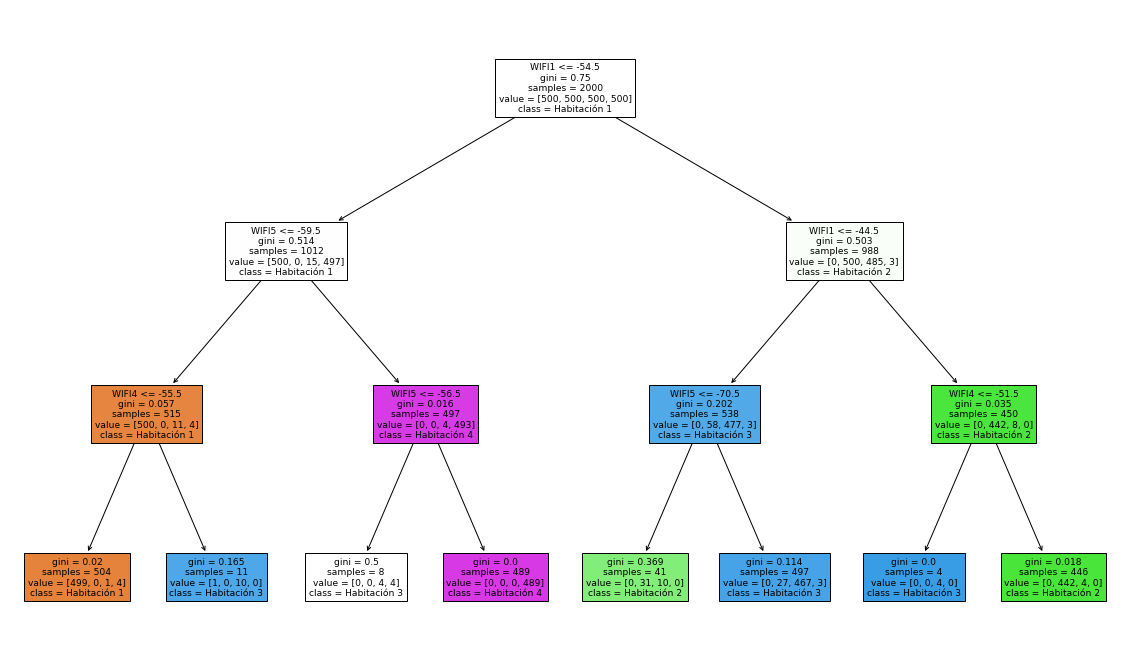

In [144]:
class_names = ['Habitación 1', 'Habitación 2', 'Habitación 3', 'Habitación 4']
plt.figure(figsize=(20,12))
plot_tree(decision_tree=model, feature_names=explicativas.columns, class_names=class_names, filled=True);

In [145]:
# Se evalua la probabilidad de acierto del modelo

y_pred=model.predict(explicativas)
df_copy=df.copy()
df_copy['PREDICCION']=y_pred
probabilidad=(df_copy['ROOM']==df_copy['PREDICCION']).sum()/df_copy.shape[0]

print(f'El porcentaje de probabilidad de acierto de nuestro modelo es de: {probabilidad*100}%')

El porcentaje de probabilidad de acierto de nuestro modelo es de: 97.3%


### Conclusion
El modelo de arbol concigue hasta un 97% de precision al momento de definir a que habitacion se refiere segun las intensidades de las antenas. 
Lo importante es que concigue este resultando solo utilizando algunas 3 antenas de las 7 conocidas. Lo que representa una posible optimizacion en el tamaño del dataframe 

# KNeighborsClassifier
Este modelo de aprendizaje supervisado agrupa las variables conocidas para poder indentificarlas.


In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Separar características y etiquetas

X = df.drop(columns='ROOM')
y = df.ROOM

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de clasificación (KNN con k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Probabilidad de acierto del modelo es de: ", accuracy*100,'%')




Probabilidad de acierto del modelo es de:  98.16666666666667 %


In [131]:
# Analizamos el porcentaje de probabilidad de acierto

y_pred=knn.predict(X)
df_copy=df.copy()
df_copy['PREDICCION']=y_pred
probabilidad=(df_copy['ROOM']==df_copy['PREDICCION']).sum()/df_copy.shape[0]

print(f'El porcentaje de probabilidad de acierto de nuestro modelo es de: {probabilidad*100}%')

El porcentaje de probabilidad de acierto de nuestro modelo es de: 98.85000000000001%


### Conclusion
El modelo acierta un 98% de las ocaciones con la habitacion de la que proviene la señal. Practicamente igual al modelo de arbol. Entre saber cual elegir es cuestion de recursos, generalmente este modelo KNN es conocido por ser de los mas simples. 

## Diagrama de Pareto para saber la importancia de las variables


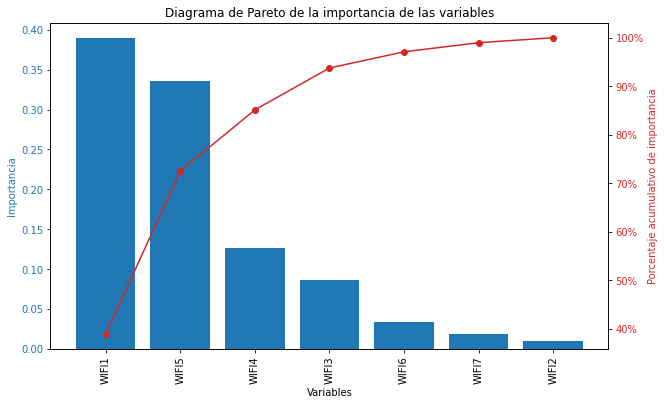

In [138]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import permutation_importance
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import MultipleLocator

# Entrenar el modelo de XGBoost
model = xgb.XGBClassifier()
model.fit(X, y)

# Obtener la importancia de las características
importance = list(zip(explicativas.columns, model.feature_importances_))
importance.sort(key=lambda x: x[1], reverse=True)
sorted_features, importances = zip(*importance)

cumulative_importance = np.cumsum(importances)
total_importance = np.sum(importances)
cumulative_percentage = 100 * cumulative_importance / total_importance

fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.bar(sorted_features, importances, color=color)
ax1.set_xlabel('Variables')
ax1.set_ylabel('Importancia', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(sorted_features, cumulative_percentage, color=color, marker='o')
ax2.set_ylabel('Porcentaje acumulativo de importancia', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.yaxis.set_major_locator(MultipleLocator(10))

plt.title('Diagrama de Pareto de la importancia de las variables')
plt.show()

### Conclusion
El diagrama de Pareto nos representa como el 80% de la importancia esta dado por el 20% de las variables, en este caso 3 señales de WiFi definen en su mayor parte a las habitaciones. WiFi 1, WiFi 5, WiFi 4. 
Lo que permite reducir la dimensionalidad del DataFrame cuando se necesite optimizar la carga de datos.  